In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#parameters
L = 8
T = 1
J = 1
steps = 5000
m_avg = 0

N = L**3
theta = np.zeros((L,L,L))
for i in range(L):
    for j in range(L):
        for k in range(L):
            theta[i,j,k] = np.random.uniform(0,2*np.pi)

In [3]:
def find_neighbors(i,j,k):
    # PBC
    index = [L-1 if i == 0 else i-1, 0 if i == L-1 else i+1, L-1 if j == 0 else j-1, 0 if j == L-1 else j+1, L-1 if k == 0 else k-1, 0 if k == L-1 else k+1]
    return index

In [4]:
def energy_per_site(i,j,k):
    index = find_neighbors(i,j,k)
    E = -J*(np.cos(theta[i,j,k] - theta[index[0],j,k])
    + np.cos(theta[index[1],j,k] - theta[i,j,k])
    + np.cos(theta[i,j,k] - theta[i,index[2],k])
    + np.cos(theta[i,index[3],k] - theta[i,j,k])
    + np.cos(theta[i,j,k] - theta[i,j,index[4]])
    + np.cos(theta[i,j,index[5]] - theta[i,j,k]))
    return E

In [5]:
def flip():
    i = np.random.randint(0,L)
    j = np.random.randint(0,L)
    k = np.random.randint(0,L)
    theta_b = theta[i,j,k]
    E_b = energy_per_site(i,j,k)
    theta[i,j,k] = np.random.uniform(0,2*np.pi)
    dE = energy_per_site(i,j,k) - E_b
    if dE < 0:
        return True
    elif (np.exp(-dE/T) > np.random.uniform(0,1)):
        return True
    else:
        theta[i,j,k] = theta_b
        return False

In [6]:
def MCMC():
    for i in range(N):
        v = flip()

In [7]:
def magnetization():
    mx = np.sum(np.cos(theta))
    my = np.sum(np.sin(theta))
    return np.sqrt(mx**2 + my**2)/N

In [8]:
def runMCMC():
    m = 0
    for l in range(steps):
        m += np.abs(magnetization())
        MCMC()
    m_abs = m/steps
    return m_abs

In [9]:
Ts = np.linspace(1,4,50)
m_avg = np.zeros(len(Ts))
for i in range(len(Ts)):
    T = Ts[i]
    m_avg[i] = runMCMC()

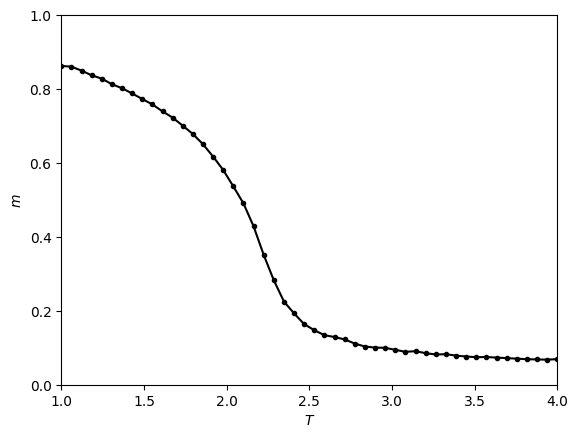

In [11]:
plt.figure()
plt.plot(Ts,m_avg,'k.-')
plt.xlabel('$T$')
plt.ylabel('$m$')
plt.xlim(1,4)
plt.ylim(0,1)
plt.show()

In [15]:
with open('m_%i.csv' %L, 'w') as my_file:
    np.savetxt(my_file,m_avg)